       93706   26027.04763   0.5    0  0.9  0.1  0.07  1.1  1.8  0.2   0.4  \
1                                                                            
2      93715   28400.58317  0.30  0.0  1.3  0.0  0.10  0.0  0.6  0.0  0.20   
3      93717  141021.88470  0.40  0.0  1.4  0.0  0.30  0.0  1.0  0.0  0.30   
4      93721   23886.49561  0.20  0.0  0.8  0.0  0.07  1.0  0.5  0.0  0.10   
5      93723  703434.33210  0.30  0.0  2.9  0.0  0.10  0.0  0.6  0.0  0.20   
6      93738  188702.95970  0.20  0.0  2.2  0.0  0.10  0.0  0.8  0.0  0.10   
...      ...           ...   ...  ...  ...  ...   ...  ...  ...  ...   ...   
2129  102933   55613.35691  0.10  0.0  0.4  0.0  0.20  0.0  0.2  0.0  0.20   
2130  102943   91163.65915  0.20  0.0  0.4  0.0  0.10  0.0  0.3  0.0  0.20   
2131  102945   69191.31259  0.10  0.0  3.0  0.0  0.07  1.0  0.2  0.0  0.07   
2132  102952   68053.96799  0.20  0.0  3.9  0.0  2.70  0.0  1.2  0.0  0.20   
2133  102955   61385.06801  0.07  1.0  0.3  0.0  0.07  1.0  0.2 

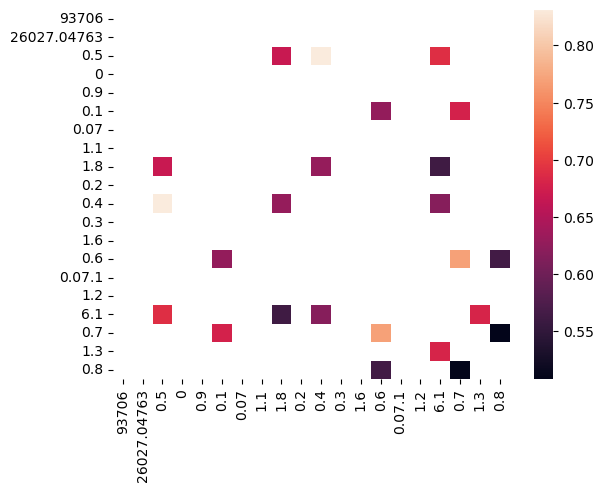

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import savefig

data = pd.read_csv("../data/Lab_Data/PFAS_J.csv", index_col = 0, header = 1)
print(data)

dataf = data.dropna() #removing the N/A
dataf.to_csv("../results/PFAS_J_cleaned.csv")

print(dataf)



pc = dataf.corr()

pce = pc[(pc > 0.5) & (pc < 0.999)] #pc export
dataf.to_csv("../results/pearsonCorrelationCoefficients.csv")

hm = sns.heatmap(pce)
plt.show()

hm.get_figure().savefig('../results/pearsonCorrelationCoefficientsHeatMap.png', dpi=400)





# Imports

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import savefig
import itertools
import statsmodels.api as sm

# Part 1

In [11]:
data = pd.read_csv("../data/Lab_Data/PFAS_J.csv", index_col = 0, header = 1)
print(data)

dataf = data.dropna() #removing the N/A
dataf.to_csv("../results/PFAS_J_cleaned.csv")

print(dataf)

       93706   26027.04763   0.5    0  0.9  0.1  0.07  1.1  1.8  0.2   0.4  \
1                                                                            
2      93715   28400.58317  0.30  0.0  1.3  0.0  0.10  0.0  0.6  0.0  0.20   
3      93717  141021.88470  0.40  0.0  1.4  0.0  0.30  0.0  1.0  0.0  0.30   
4      93721   23886.49561  0.20  0.0  0.8  0.0  0.07  1.0  0.5  0.0  0.10   
5      93723  703434.33210  0.30  0.0  2.9  0.0  0.10  0.0  0.6  0.0  0.20   
6      93738  188702.95970  0.20  0.0  2.2  0.0  0.10  0.0  0.8  0.0  0.10   
...      ...           ...   ...  ...  ...  ...   ...  ...  ...  ...   ...   
2129  102933   55613.35691  0.10  0.0  0.4  0.0  0.20  0.0  0.2  0.0  0.20   
2130  102943   91163.65915  0.20  0.0  0.4  0.0  0.10  0.0  0.3  0.0  0.20   
2131  102945   69191.31259  0.10  0.0  3.0  0.0  0.07  1.0  0.2  0.0  0.07   
2132  102952   68053.96799  0.20  0.0  3.9  0.0  2.70  0.0  1.2  0.0  0.20   
2133  102955   61385.06801  0.07  1.0  0.3  0.0  0.07  1.0  0.2 

# Part 2

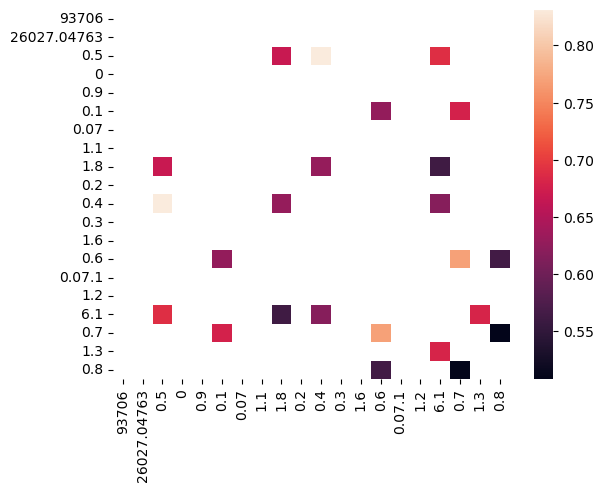

In [12]:
pc = dataf.corr()

pce = pc[(pc > 0.5) & (pc < 0.999)] #pc export
dataf.to_csv("../results/pearsonCorrelationCoefficients.csv")

hm = sns.heatmap(pce)
plt.show()

hm.get_figure().savefig('../results/pearsonCorrelationCoefficientsHeatMap.png', dpi=400)

## Findings 

The data is scatterd and doese not show much if any coorilation.

# Part 3

      var1         var2          p-val        R2
0    93706  26027.04763   1.415807e-01  0.001122
1    93706          0.5   5.980007e-01  0.000144
2    93706            0   8.039616e-01  0.000032
3    93706          0.9   2.412044e-01  0.000713
4    93706          0.1   4.871809e-03  0.004108
..     ...          ...            ...       ...
185    6.1          1.3  3.364649e-262  0.462826
186    6.1          0.8   4.697799e-03  0.004142
187    0.7          1.3   1.906619e-02  0.002850
188    0.7          0.8  4.383233e-127  0.258195
189    1.3          0.8   1.161184e-04  0.007685

[190 rows x 4 columns]
       var1 var2  p-val        R2
44      0.5  0.4    0.0  0.691238
172     0.6  0.7    0.0  0.594062
175  0.07.1  1.2    0.0  0.541676


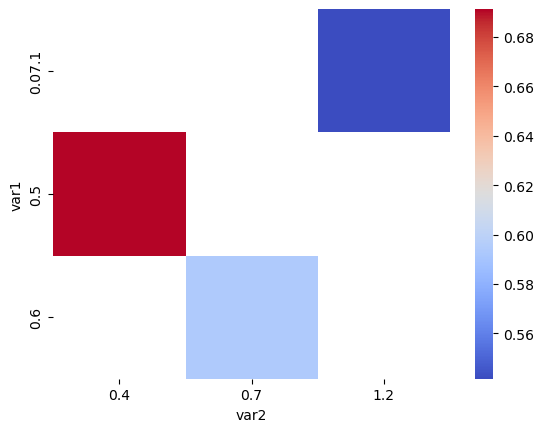

In [22]:
data = list(itertools.combinations(dataf.columns,2))
out = []

for pair in data:
    x = dataf[pair[0]]
    y = dataf[pair[1]]
    lr = sm.OLS(y, sm.add_constant(x)).fit()
    out.append({'var1':pair[0], 'var2':pair[1], 'p-val':lr.f_pvalue, 'R2':lr.rsquared})
dfOut = pd.DataFrame(out)
print(dfOut)

R2V = dfOut[(dfOut["R2"]>0.5) & (dfOut["R2"]<.999)]
print(R2V)
R2V.to_csv("../results/R2.csv")

R2HM = pd.pivot_table(R2V, values = "R2", index = ['var1'], columns = ['var2'])
hm2 = sns.heatmap(R2HM, cmap = "coolwarm")
plt.show()

hm2.get_figure().savefig('../results/RSquared.png', dpi=400)

## Findings

The RSquared covers a small range and is whithin the range showing the linear regression is good.